Modelos de Regresion

1. Regresion Lineal

In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, f1_score, recall_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
from sklearn.decomposition import KernelPCA
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import xgboost as xgb
from sklearn.svm import SVC, SVR
from sklearn.model_selection import GridSearchCV

db_ipsa = pd.read_csv('Clean_BD_IPSA_1940.csv')
drop_ipsa = db_ipsa.drop(columns=["TCH","Unnamed: 0", "Id", "NOME","TAL", "sacarosa"])
tch_ipsa = db_ipsa["TCH"]
sac_ipsa = db_ipsa["sacarosa"]
catSac_ipsa =  db_ipsa["catSac"]

db_amarillos = pd.read_csv('Clean_HISTORICO_SUERTES_AMARILLOS.csv')
drop_amarillos = db_amarillos.drop(columns=["Unnamed: 0", "Período", "TCHM", "TAHM", "TAH", "Ano Ult.Corte", "Ano Siembra", "TCH", "KATRHM", "%ATR", "%Sac.Caña", "Rdto", "%Sac.Muestreadora"])
tch_amarillos = db_amarillos["TCH"]
sac_amarillos = db_amarillos["%Sac.Caña"]
catSac_amarillos = db_amarillos["catSac"]

db_azules = pd.read_csv('Clean_HISTORICO_SUERTES_AZULES.csv')
drop_azules = db_azules.drop(columns=["Unnamed: 0", "Período", "TCHM", "TAHM", "TAH", "Ano Ult.Corte", "Ano Siembra", "TCH", "KATRHM", "%ATR", "%Sac.Caña", "Rdto", "%Sac.Muestreadora"])
tch_azules = db_azules["TCH"]
sac_azules = db_azules["%Sac.Caña"]
catSac_azules = db_azules["catSac"]

# Regresion

In [2]:
db_ipsa.head()

,Unnamed: 0,Id,NOME,FAZ,TAL,dosismad,semsmad,edad,cortes,me,vejez,sacarosa,mes,periodo,TCH,lluvias,grupo_tenencia,pct_diatrea,catSac
0,0,11,AMAIME SILCA,81291,40,0.8,8.3,12.3,4,12.7,2.4,14.0,12,202012,112,137,3,6.2,2
1,1,12,AMAIME SILCA,81291,41,0.8,6.3,11.2,2,7.8,2.3,13.0,3,201903,157,0,3,3.5,1
2,2,13,AMAIME SILCA,81291,41,0.6,7.9,12.2,3,8.8,1.8,13.3,3,202003,167,68,3,4.3,2
3,3,15,AMAIME SILCA,81291,43,0.8,6.6,13.1,1,6.1,2.5,13.4,3,201903,156,0,3,3.5,2
4,4,16,AMAIME SILCA,81291,43,0.6,8.1,12.2,2,7.9,2.1,14.0,3,202003,151,68,3,4.3,2


In [3]:
db_amarillos.head()

,Unnamed: 0,Período,Hacienda,Zona,Tenencia,Suerte,Suelo,Area Neta,Dist Km,Variedad,...,Precipitacion 0_3,Precipitacion Ciclo,Evaporacion 0-3,Evaporacion Ciclo,DS_indicator,catSac,Mes Siembra,Ano Siembra,Mes Ult.Corte,Ano Ult.Corte
0,13972,202202,80101,0,11.0,0,0,0.240154,0.025522,0,...,510.8,1523.1,420.8,1744.2,True,0,11,2017,11,2022
1,13973,202202,80101,0,11.0,1,0,0.099385,0.025522,1,...,510.8,1523.1,420.8,1744.2,True,0,2,2021,2,2022
2,13974,202202,80102,0,11.0,2,1,0.202308,0.020882,0,...,468.1,1422.3,421.7,1716.2,True,0,4,2019,4,2022
3,13975,202202,80102,0,11.0,3,2,0.017692,0.020882,2,...,505.4,1530.9,423.4,1765.5,True,0,7,2016,7,2022
4,13976,202202,80102,0,11.0,4,3,0.316923,0.020882,2,...,459.5,1430.4,420.0,1719.1,True,0,10,2018,10,2022


In [4]:
db_azules.head()

,Unnamed: 0,Período,Hacienda,Zona,Tenencia,Suerte,Suelo,Area Neta,Dist Km,Variedad,...,Lluvias seis a nueve,Luvias 9 -FC,%Infest.Diatrea,Fosfato Jugo,DS_indicator,catSac,Mes Siembra,Ano Siembra,Mes Ult.Corte,Ano Ult.Corte
0,0,201701,80493,0,51.0,0,0,0.092308,0.027742,0,...,102.0,482.0,0.0,0.001238,False,0,8,2010,1,2017
1,1,201701,81284,1,81.0,1,1,0.022308,0.164582,0,...,0.0,0.0,0.0,0.002658,False,0,1,2011,1,2017
2,2,201701,80203,1,31.0,2,2,0.126769,0.148387,1,...,113.0,457.0,0.0,0.001572,True,0,10,2011,1,2017
3,3,201701,81380,1,82.0,3,3,0.016154,0.429032,2,...,0.0,0.0,0.0,0.001934,False,0,3,2014,1,2017
4,4,201701,80298,2,31.0,4,4,0.069692,0.109677,3,...,188.0,284.0,0.0,0.001698,True,0,1,2013,1,2017


## Regresion Lineal

### IPSA

In [9]:
X_train, X_test, y_sacarosa_train, y_sacarosa_test = train_test_split(drop_ipsa, sac_ipsa, test_size=0.3, random_state=42)
_, _, y_TCH_train, y_TCH_test = train_test_split(drop_ipsa, tch_ipsa, test_size=0.3, random_state=42)

model_sacarosa = LinearRegression()
model_sacarosa.fit(X_train, y_sacarosa_train)

model_TCH = LinearRegression()
model_TCH.fit(X_train, y_TCH_train)

y_sacarosa_pred = model_sacarosa.predict(X_test)
y_TCH_pred = model_TCH.predict(X_test)

In [10]:
# Evaluar el rendimiento de los modelos
sacarosa_rmse = mean_squared_error(y_sacarosa_test, y_sacarosa_pred, squared=False)
sacarosa_r2 = r2_score(y_sacarosa_test, y_sacarosa_pred)

TCH_rmse = mean_squared_error(y_TCH_test, y_TCH_pred, squared=False)
TCH_r2 = r2_score(y_TCH_test, y_TCH_pred)

# Resultados
print("Modelo para estimar el porcentaje de sacarosa:")
print(f"RMSE: {sacarosa_rmse}")
print(f"R^2: {sacarosa_r2}")

print("\nModelo para estimar el TCH:")
print(f"RMSE: {TCH_rmse}")
print(f"R^2: {TCH_r2}")

Modelo para estimar el porcentaje de sacarosa:
RMSE: 0.35747475877591134
R^2: 0.7886483613495762

Modelo para estimar el TCH:
RMSE: 22.52950894113398
R^2: 0.10093730853706484


/home/camilin/Documents/Icesi/Inteligencia Artificial/Laboratorio2IA/.venv/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/camilin/Documents/Icesi/Inteligencia Artificial/Laboratorio2IA/.venv/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### Amarillos

In [11]:
X_train, X_test, y_sacarosa_train, y_sacarosa_test = train_test_split(drop_amarillos, sac_amarillos, test_size=0.3, random_state=42)
_, _, y_TCH_train, y_TCH_test = train_test_split(drop_amarillos, tch_amarillos, test_size=0.3, random_state=42)

model_sacarosa = LinearRegression()
model_sacarosa.fit(X_train, y_sacarosa_train)

model_TCH = LinearRegression()
model_TCH.fit(X_train, y_TCH_train)

y_sacarosa_pred = model_sacarosa.predict(X_test)
y_TCH_pred = model_TCH.predict(X_test)

In [12]:
# Evaluar el rendimiento de los modelos
sacarosa_rmse = mean_squared_error(y_sacarosa_test, y_sacarosa_pred, squared=False)
sacarosa_r2 = r2_score(y_sacarosa_test, y_sacarosa_pred)

TCH_rmse = mean_squared_error(y_TCH_test, y_TCH_pred, squared=False)
TCH_r2 = r2_score(y_TCH_test, y_TCH_pred)

# Resultados
print("Modelo para estimar el porcentaje de sacarosa:")
print(f"RMSE: {sacarosa_rmse}")
print(f"R^2: {sacarosa_r2}")

print("\nModelo para estimar el TCH:")
print(f"RMSE: {TCH_rmse}")
print(f"R^2: {TCH_r2}")

Modelo para estimar el porcentaje de sacarosa:
RMSE: 0.025018863017493082
R^2: 0.8677953886431677

Modelo para estimar el TCH:
RMSE: 0.06580781783390942
R^2: 0.6065466824748332


/home/camilin/Documents/Icesi/Inteligencia Artificial/Laboratorio2IA/.venv/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/camilin/Documents/Icesi/Inteligencia Artificial/Laboratorio2IA/.venv/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Base de datos HISTORICO (Azul)

In [13]:
X_train, X_test, y_sacarosa_train, y_sacarosa_test = train_test_split(drop_azules, sac_azules, test_size=0.3, random_state=42)
_, _, y_TCH_train, y_TCH_test = train_test_split(drop_azules, tch_azules, test_size=0.3, random_state=42)

model_sacarosa = LinearRegression()
model_sacarosa.fit(X_train, y_sacarosa_train)

model_TCH = LinearRegression()
model_TCH.fit(X_train, y_TCH_train)

y_sacarosa_pred = model_sacarosa.predict(X_test)
y_TCH_pred = model_TCH.predict(X_test)

In [14]:
# Evaluar el rendimiento de los modelos
sacarosa_rmse = mean_squared_error(y_sacarosa_test, y_sacarosa_pred, squared=False)
sacarosa_r2 = r2_score(y_sacarosa_test, y_sacarosa_pred)

TCH_rmse = mean_squared_error(y_TCH_test, y_TCH_pred, squared=False)
TCH_r2 = r2_score(y_TCH_test, y_TCH_pred)

# Resultados
print("Modelo para estimar el porcentaje de sacarosa:")
print(f"RMSE: {sacarosa_rmse}")
print(f"R^2: {sacarosa_r2}")

print("\nModelo para estimar el TCH:")
print(f"RMSE: {TCH_rmse}")
print(f"R^2: {TCH_r2}")

Modelo para estimar el porcentaje de sacarosa:
RMSE: 0.03088154291025701
R^2: 0.7547146054526862

Modelo para estimar el TCH:
RMSE: 0.06855292715115255
R^2: 0.5983140604251017


/home/camilin/Documents/Icesi/Inteligencia Artificial/Laboratorio2IA/.venv/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/camilin/Documents/Icesi/Inteligencia Artificial/Laboratorio2IA/.venv/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


2. Xgboost

In [15]:
X_train, X_test, y_sacarosa_train, y_sacarosa_test = train_test_split(drop_ipsa, sac_ipsa, test_size=0.3, random_state=42)
_, _, y_TCH_train, y_TCH_test = train_test_split(drop_ipsa, tch_ipsa, test_size=0.3, random_state=42)

xgbModelSac = xgb.XGBRegressor(objective="reg:squarederror", gamma = 0.1, max_depth = 10, n_estimators = 500)
xgbModelSac.fit(X = X_train, y = y_sacarosa_train)

xgbModelTCH = xgb.XGBRegressor(objective="reg:squarederror",  gamma = 0.1, max_depth = 10, n_estimators = 500)
xgbModelTCH.fit(X_train, y_TCH_train)

y_sacarosa_pred = xgbModelSac.predict(X_test)
y_TCH_pred = xgbModelTCH.predict(X_test)

In [16]:
sacarosa_rmse = mean_squared_error(y_sacarosa_test, y_sacarosa_pred, squared=False)
sacarosa_r2 = r2_score(y_sacarosa_test, y_sacarosa_pred)

TCH_rmse = mean_squared_error(y_TCH_test, y_TCH_pred, squared=False)
TCH_r2 = r2_score(y_TCH_test, y_TCH_pred)

# Resultados
print("Modelo para estimar el porcentaje de sacarosa:")
print(f"RMSE: {sacarosa_rmse}")
print(f"R^2: {sacarosa_r2}")

print("\nModelo para estimar el TCH:")
print(f"RMSE: {TCH_rmse}")
print(f"R^2: {TCH_r2}")

Modelo para estimar el porcentaje de sacarosa:
RMSE: 0.371911775392448
R^2: 0.7712322956916684

Modelo para estimar el TCH:
RMSE: 21.283648190650943
R^2: 0.1976226568222046


/home/camilin/Documents/Icesi/Inteligencia Artificial/Laboratorio2IA/.venv/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/camilin/Documents/Icesi/Inteligencia Artificial/Laboratorio2IA/.venv/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [17]:
X_train, X_test, y_sacarosa_train, y_sacarosa_test = train_test_split(drop_amarillos, sac_amarillos, test_size=0.3, random_state=42)
_, _, y_TCH_train, y_TCH_test = train_test_split(drop_amarillos, tch_amarillos, test_size=0.3, random_state=42)

xgbModelSac = xgb.XGBRegressor(objective="reg:squarederror", gamma = 0.1, max_depth = 10, n_estimators = 500)
xgbModelSac.fit(X = X_train, y = y_sacarosa_train)

xgbModelTCH = xgb.XGBRegressor(objective="reg:squarederror",  gamma = 0.1, max_depth = 10, n_estimators = 500)
xgbModelTCH.fit(X_train, y_TCH_train)

y_sacarosa_pred = xgbModelSac.predict(X_test)
y_TCH_pred = xgbModelTCH.predict(X_test)

In [263]:
sacarosa_rmse = mean_squared_error(y_sacarosa_test, y_sacarosa_pred, squared=False)
sacarosa_r2 = r2_score(y_sacarosa_test, y_sacarosa_pred)

TCH_rmse = mean_squared_error(y_TCH_test, y_TCH_pred, squared=False)
TCH_r2 = r2_score(y_TCH_test, y_TCH_pred)

# Resultados
print("Modelo para estimar el porcentaje de sacarosa:")
print(f"RMSE: {sacarosa_rmse}")
print(f"R^2: {sacarosa_r2}")

print("\nModelo para estimar el TCH:")
print(f"RMSE: {TCH_rmse}")
print(f"R^2: {TCH_r2}")

Modelo para estimar el porcentaje de sacarosa:
RMSE: 0.02220427049586818
R^2: 0.8681118398891551

Modelo para estimar el TCH:
RMSE: 0.04991744610933071
R^2: 0.6925070529842082


/home/camilin/Documents/Icesi/Inteligencia Artificial/Laboratorio2IA/.venv/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/camilin/Documents/Icesi/Inteligencia Artificial/Laboratorio2IA/.venv/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [264]:
X_train, X_test, y_sacarosa_train, y_sacarosa_test = train_test_split(drop_azules, sac_azules, test_size=0.3, random_state=42)
_, _, y_TCH_train, y_TCH_test = train_test_split(drop_azules, tch_azules, test_size=0.3, random_state=42)

xgbModelSac = xgb.XGBRegressor(objective="reg:squarederror", gamma = 0.1, max_depth = 10, n_estimators = 500)
xgbModelSac.fit(X = X_train, y = y_sacarosa_train)

xgbModelTCH = xgb.XGBRegressor(objective="reg:squarederror",  gamma = 0.1, max_depth = 10, n_estimators = 500)
xgbModelTCH.fit(X_train, y_TCH_train)

y_sacarosa_pred = xgbModelSac.predict(X_test)
y_TCH_pred = xgbModelTCH.predict(X_test)

In [265]:
sacarosa_rmse = mean_squared_error(y_sacarosa_test, y_sacarosa_pred, squared=False)
sacarosa_r2 = r2_score(y_sacarosa_test, y_sacarosa_pred)

TCH_rmse = mean_squared_error(y_TCH_test, y_TCH_pred, squared=False)
TCH_r2 = r2_score(y_TCH_test, y_TCH_pred)

# Resultados
print("Modelo para estimar el porcentaje de sacarosa:")
print(f"RMSE: {sacarosa_rmse}")
print(f"R^2: {sacarosa_r2}")

print("\nModelo para estimar el TCH:")
print(f"RMSE: {TCH_rmse}")
print(f"R^2: {TCH_r2}")

Modelo para estimar el porcentaje de sacarosa:
RMSE: 0.01960596344164606
R^2: 0.878612534914946

Modelo para estimar el TCH:
RMSE: 0.03399244499352093
R^2: 0.873423164664734


/home/camilin/Documents/Icesi/Inteligencia Artificial/Laboratorio2IA/.venv/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/camilin/Documents/Icesi/Inteligencia Artificial/Laboratorio2IA/.venv/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


3. SVM

### IPSA

In [37]:
# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(drop_ipsa)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, tch_ipsa, test_size=0.3, random_state=42)


# Train the SVM model on the classified `%Sac.Caña`
svm_model_sacarosa = SVR(kernel='rbf', gamma='scale', C=1)
svm_model_sacarosa.fit(X_train, y_train)

# Predictions and evaluation
y_pred_sacarosa = svm_model_sacarosa.predict(X_test)

accuracy_sacarosa = r2_score(y_test, y_pred_sacarosa)

#report = classification_report(y_test, y_pred)

print("Sacarosa: ",accuracy_sacarosa)

Sacarosa:  0.12401875585514754


In [38]:
# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(drop_ipsa)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, sac_ipsa, test_size=0.3, random_state=42)


# Train the SVM model on the classified `%Sac.Caña`
svm_model_sacarosa = SVR(kernel='rbf', gamma='scale', C=1)
svm_model_sacarosa.fit(X_train, y_train)

# Predictions and evaluation
y_pred_sacarosa = svm_model_sacarosa.predict(X_test)

accuracy_sacarosa = r2_score(y_test, y_pred_sacarosa)

#report = classification_report(y_test, y_pred)

print("Sacarosa: ",accuracy_sacarosa)

Sacarosa:  0.7537879655633267


### Amarillos

In [39]:
# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(drop_amarillos)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, tch_amarillos, test_size=0.3, random_state=42)


# Train the SVM model on the classified `%Sac.Caña`
svm_model_sacarosa = SVR(kernel='rbf', gamma='scale', C=1)
svm_model_sacarosa.fit(X_train, y_train)

# Predictions and evaluation
y_pred_sacarosa = svm_model_sacarosa.predict(X_test)

accuracy_sacarosa = r2_score(y_test, y_pred_sacarosa)

#report = classification_report(y_test, y_pred)

print("Sacarosa: ",accuracy_sacarosa)

Sacarosa:  0.4922017083709599


In [40]:
# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(drop_amarillos)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, sac_amarillos, test_size=0.3, random_state=42)


# Train the SVM model on the classified `%Sac.Caña`
svm_model_sacarosa = SVR(kernel='rbf', gamma='scale', C=1)
svm_model_sacarosa.fit(X_train, y_train)

# Predictions and evaluation
y_pred_sacarosa = svm_model_sacarosa.predict(X_test)

accuracy_sacarosa = r2_score(y_test, y_pred_sacarosa)

#report = classification_report(y_test, y_pred)

print("Sacarosa: ",accuracy_sacarosa)

Sacarosa:  0.5837636240672641


### Azules

In [41]:
# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(drop_azules)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, tch_azules, test_size=0.3, random_state=42)


# Train the SVM model on the classified `%Sac.Caña`
svm_model_sacarosa = SVR(kernel='rbf', gamma='scale', C=1)
svm_model_sacarosa.fit(X_train, y_train)

# Predictions and evaluation
y_pred_sacarosa = svm_model_sacarosa.predict(X_test)

accuracy_sacarosa = r2_score(y_test, y_pred_sacarosa)

#report = classification_report(y_test, y_pred)

print("Sacarosa: ",accuracy_sacarosa)

Sacarosa:  0.6068733878436419


In [42]:
# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(drop_azules)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, sac_azules, test_size=0.3, random_state=42)


# Train the SVM model on the classified `%Sac.Caña`
svm_model_sacarosa = SVR(kernel='rbf', gamma='scale', C=1)
svm_model_sacarosa.fit(X_train, y_train)

# Predictions and evaluation
y_pred_sacarosa = svm_model_sacarosa.predict(X_test)

accuracy_sacarosa = r2_score(y_test, y_pred_sacarosa)

#report = classification_report(y_test, y_pred)

print("Sacarosa: ",accuracy_sacarosa)

Sacarosa:  0.6495703033564595


Carmo, Lo de Logistica ya no completaria los 3 de regresion? en el codigo se esta usando la libreria de Regresion, o sera cambiarla?

2. Clasificación

1. Regresion Logistica

Base de datos IPSA

In [18]:
X_train, X_test, y_train, y_test = train_test_split(drop_ipsa, catSac_ipsa, test_size=0.3, random_state=42)

model_logistic = LogisticRegression(max_iter=10000)
model_logistic.fit(X_train, y_train)

# Realizar predicciones
y_pred = model_logistic.predict(X_test)

/home/camilin/Documents/Icesi/Inteligencia Artificial/Laboratorio2IA/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [19]:
# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Exactitud del modelo:", accuracy)
print("\nMatriz de Confusión:\n", conf_matrix)
print("\nReporte de Clasificación:\n", class_report)

Exactitud del modelo: 0.9463955637707948

Matriz de Confusión:
 [[167   0   0]
 [  1 144  14]
 [  0  14 201]]

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       167
           1       0.91      0.91      0.91       159
           2       0.93      0.93      0.93       215

    accuracy                           0.95       541
   macro avg       0.95      0.95      0.95       541
weighted avg       0.95      0.95      0.95       541



Base de datos HISTORICO (Amarillo)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(drop_amarillos, catSac_amarillos, test_size=0.3, random_state=42)

model_logistic = LogisticRegression(max_iter=100000)
model_logistic.fit(X_train, y_train)

# Realizar predicciones
y_pred = model_logistic.predict(X_test)

/home/camilin/Documents/Icesi/Inteligencia Artificial/Laboratorio2IA/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [23]:
# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Exactitud del modelo:", accuracy)
print("\nMatriz de Confusión:\n", conf_matrix)
print("\nReporte de Clasificación:\n", class_report)

Exactitud del modelo: 0.6745426829268293

Matriz de Confusión:
 [[804   3  28]
 [173   1  19]
 [202   2  80]]

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.68      0.96      0.80       835
           1       0.17      0.01      0.01       193
           2       0.63      0.28      0.39       284

    accuracy                           0.67      1312
   macro avg       0.49      0.42      0.40      1312
weighted avg       0.59      0.67      0.59      1312



Base de datos HISTORICO (Azul)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(drop_azules, catSac_azules, test_size=0.3, random_state=42)

model_logistic = LogisticRegression(max_iter=10000)
model_logistic.fit(X_train, y_train)

# Realizar predicciones
y_pred = model_logistic.predict(X_test)

/home/camilin/Documents/Icesi/Inteligencia Artificial/Laboratorio2IA/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [25]:
# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Exactitud del modelo:", accuracy)
print("\nMatriz de Confusión:\n", conf_matrix)
print("\nReporte de Clasificación:\n", class_report)

Exactitud del modelo: 0.7544541626174279

Matriz de Confusión:
 [[3349    2   42]
 [ 782   12  311]
 [ 356   23 1297]]

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.75      0.99      0.85      3393
           1       0.32      0.01      0.02      1105
           2       0.79      0.77      0.78      1676

    accuracy                           0.75      6174
   macro avg       0.62      0.59      0.55      6174
weighted avg       0.68      0.75      0.68      6174



Modelos de Clasificacion

1. Xgboost

In [26]:
# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(drop_ipsa, catSac_ipsa, test_size=0.2, random_state=42)

# Configuración del clasificador XGBoost
xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=3, gamma = 0.1, max_depth = 10, n_estimators = 500)
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

# Calcular precisión
accuracy = accuracy_score(y_test, y_pred)
print("Precisión en el conjunto de prueba:", accuracy)

Precisión en el conjunto de prueba: 1.0


Varianza explicada por cada componente principal:
Componente 1: 0.1691
Componente 2: 0.1493
Componente 3: 0.1083
Componente 4: 0.0874
Componente 5: 0.0847
Componente 6: 0.0835
Componente 7: 0.0747
Componente 8: 0.0730
Componente 9: 0.0587
Componente 10: 0.0452
Componente 11: 0.0384
Componente 12: 0.0276


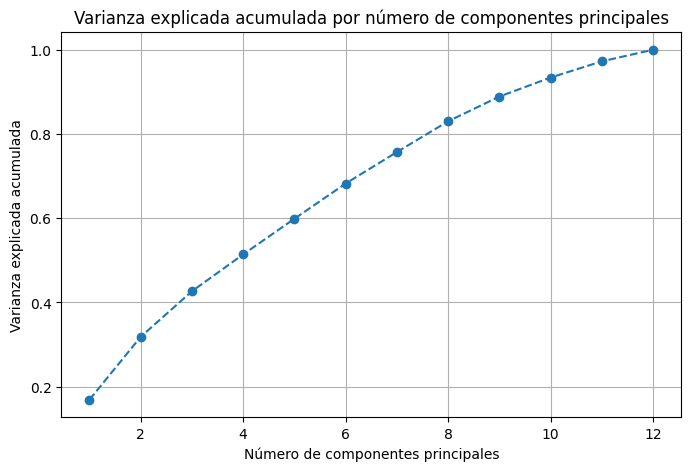

In [ ]:
#Calcular la varianza explicada acumulada

data_2=drop_ipsa
X = StandardScaler().fit_transform(data_2)
pca = PCA() # Reduce to 2 dimensions for visualization  # Reduce to 2 dimensions for visualization
pca.fit(X)

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

#Imprimir la varianza explicada por cada componente principal
print("Varianza explicada por cada componente principal:")
for i, var_exp in enumerate(explained_variance_ratio):
  if var_exp > 0.001:
    print(f"Componente {i + 1}: {var_exp:.4f}")

#Graficar la varianza acumulada
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Varianza explicada acumulada por número de componentes principales')
plt.xlabel('Número de componentes principales')
plt.ylabel('Varianza explicada acumulada')
plt.grid(True)
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(drop_amarillos, catSac_amarillos, test_size=0.3, random_state=42)

# Configuración del clasificador XGBoost
xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=3, gamma = 0.1, max_depth = 10, n_estimators = 500)
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

# Calcular precisión
accuracy = accuracy_score(y_test, y_pred)

recall = recall_score(y_test, y_pred, average="weighted")
print("Precisión en el conjunto de prueba:", accuracy)
print(recall)

Precisión en el conjunto de prueba: 0.9409638554216867
0.9409638554216867


Varianza explicada por cada componente principal:
Componente 1: 0.1523
Componente 2: 0.0963
Componente 3: 0.0695
Componente 4: 0.0588
Componente 5: 0.0509
Componente 6: 0.0407
Componente 7: 0.0383
Componente 8: 0.0373
Componente 9: 0.0359
Componente 10: 0.0308
Componente 11: 0.0291
Componente 12: 0.0237
Componente 13: 0.0210
Componente 14: 0.0205
Componente 15: 0.0179
Componente 16: 0.0169
Componente 17: 0.0167
Componente 18: 0.0162
Componente 19: 0.0158
Componente 20: 0.0147
Componente 21: 0.0131
Componente 22: 0.0127
Componente 23: 0.0125
Componente 24: 0.0115
Componente 25: 0.0114
Componente 26: 0.0108
Componente 27: 0.0107
Componente 28: 0.0096
Componente 29: 0.0092
Componente 30: 0.0085
Componente 31: 0.0080
Componente 32: 0.0076
Componente 33: 0.0065
Componente 34: 0.0060
Componente 35: 0.0058
Componente 36: 0.0057
Componente 37: 0.0051
Componente 38: 0.0048
Componente 39: 0.0045
Componente 40: 0.0040
Componente 41: 0.0034
Componente 42: 0.0032
Componente 43: 0.0029
Componente 44

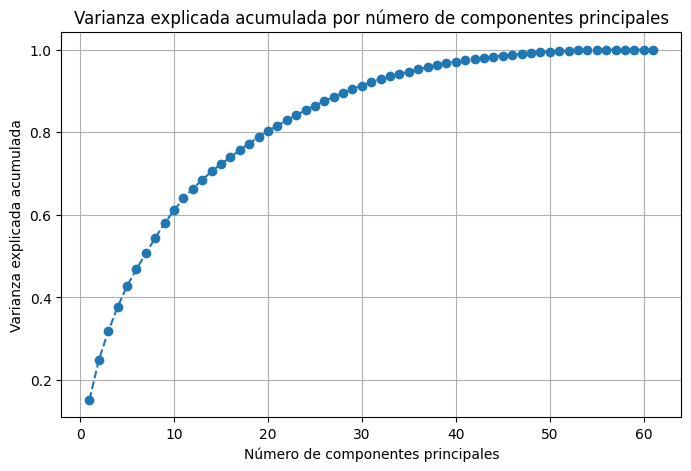

In [ ]:
#Calcular la varianza explicada acumulada

data_2=drop_amarillos
X = StandardScaler().fit_transform(data_2)
pca = PCA() # Reduce to 2 dimensions for visualization  # Reduce to 2 dimensions for visualization
pca.fit(X)

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

#Imprimir la varianza explicada por cada componente principal
print("Varianza explicada por cada componente principal:")
for i, var_exp in enumerate(explained_variance_ratio):
  if var_exp > 0.001:
    print(f"Componente {i + 1}: {var_exp:.4f}")

#Graficar la varianza acumulada
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Varianza explicada acumulada por número de componentes principales')
plt.xlabel('Número de componentes principales')
plt.ylabel('Varianza explicada acumulada')
plt.grid(True)
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(drop_azules, catSac_azules, test_size=0.3, random_state=42)

# Configuración del clasificador XGBoost
xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=3, gamma = 0.1, max_depth = 5)
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

# Calcular precisión
accuracy = accuracy_score(y_test, y_pred)
print("Precisión en el conjunto de prueba:", accuracy)

Precisión en el conjunto de prueba: 0.9458360094198245


Varianza explicada por cada componente principal:
Componente 1: 0.1500
Componente 2: 0.0867
Componente 3: 0.0670
Componente 4: 0.0535
Componente 5: 0.0478
Componente 6: 0.0456
Componente 7: 0.0383
Componente 8: 0.0361
Componente 9: 0.0338
Componente 10: 0.0308
Componente 11: 0.0259
Componente 12: 0.0253
Componente 13: 0.0230
Componente 14: 0.0227
Componente 15: 0.0221
Componente 16: 0.0218
Componente 17: 0.0211
Componente 18: 0.0189
Componente 19: 0.0186
Componente 20: 0.0174
Componente 21: 0.0167
Componente 22: 0.0163
Componente 23: 0.0155
Componente 24: 0.0148
Componente 25: 0.0145
Componente 26: 0.0133
Componente 27: 0.0118
Componente 28: 0.0113
Componente 29: 0.0108
Componente 30: 0.0091
Componente 31: 0.0088
Componente 32: 0.0084
Componente 33: 0.0075
Componente 34: 0.0070
Componente 35: 0.0061
Componente 36: 0.0059
Componente 37: 0.0051
Componente 38: 0.0045
Componente 39: 0.0030
Componente 40: 0.0017
Componente 41: 0.0014


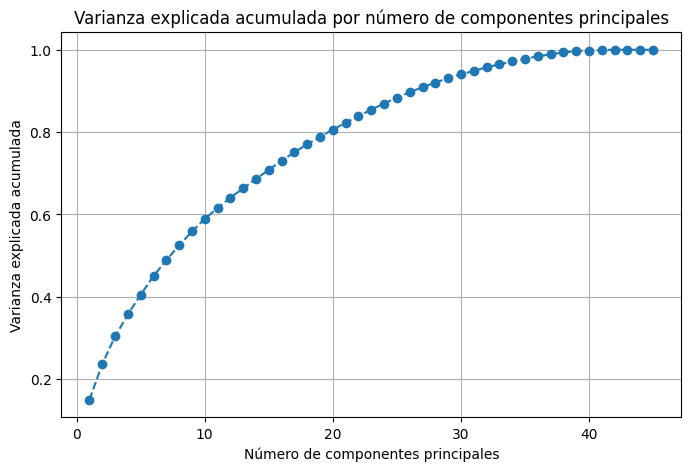

In [ ]:
#Calcular la varianza explicada acumulada

data_2=drop_azules
X = StandardScaler().fit_transform(data_2)
pca = PCA() # Reduce to 2 dimensions for visualization  # Reduce to 2 dimensions for visualization
pca.fit(X)

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

#Imprimir la varianza explicada por cada componente principal
print("Varianza explicada por cada componente principal:")
for i, var_exp in enumerate(explained_variance_ratio):
  if var_exp > 0.001:
    print(f"Componente {i + 1}: {var_exp:.4f}")

#Graficar la varianza acumulada
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Varianza explicada acumulada por número de componentes principales')
plt.xlabel('Número de componentes principales')
plt.ylabel('Varianza explicada acumulada')
plt.grid(True)
plt.show()

## SVM

### Amarillos

In [ ]:
# Sacarosa
# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(drop_amarillos)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, catSac_amarillos, test_size=0.3, random_state=42)


# Train the SVM model on the classified `%Sac.Caña`
svm_model_sacarosa = SVC(kernel='rbf', gamma='scale', C=1)
svm_model_sacarosa.fit(X_train, y_train)

# Predictions and evaluation
y_pred_sacarosa = svm_model_sacarosa.predict(X_test)

accuracy_sacarosa = accuracy_score(y_test, y_pred_sacarosa)

#report = classification_report(y_test, y_pred)

print("Sacarosa: ",accuracy_sacarosa)

Sacarosa:  0.9801829268292683


### Azules

In [ ]:

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(drop_azules)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, catSac_azules, test_size=0.3, random_state=42)


# Train the SVM model on the classified `%Sac.Caña`
svm_model_sacarosa = SVC(kernel='rbf', gamma='scale', C=1)
svm_model_sacarosa.fit(X_train, y_train)

# Predictions and evaluation
y_pred_sacarosa = svm_model_sacarosa.predict(X_test)

accuracy_sacarosa = accuracy_score(y_test, y_pred_sacarosa)

#report = classification_report(y_test, y_pred)

print("Sacarosa: ",accuracy_sacarosa)

Sacarosa:  0.9949789439585358


### IPSA

In [ ]:
# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(drop_ipsa)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, catSac_ipsa, test_size=0.3, random_state=42)


# Train the SVM model on the classified `%Sac.Caña`
svm_model_sacarosa = SVC(kernel='rbf', gamma='scale', C=1)
svm_model_sacarosa.fit(X_train, y_train)

# Predictions and evaluation
y_pred_sacarosa = svm_model_sacarosa.predict(X_test)

accuracy_sacarosa = accuracy_score(y_test, y_pred_sacarosa)

#report = classification_report(y_test, y_pred)

print("Sacarosa: ",accuracy_sacarosa)

Sacarosa:  0.9963031423290203
